# Support Vector Machines


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Large margin classification


In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [3]:
from sklearn.svm import SVC

In [4]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

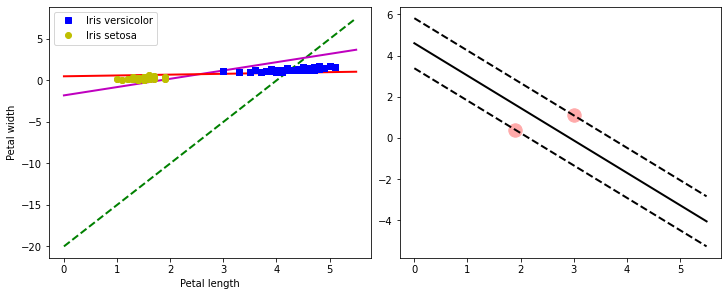

In [5]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax, ax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    ax.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    ax.plot(x0, decision_boundary, "k-", lw=2)
    ax.plot(x0, gutter_up, "k--", lw=2)
    ax.plot(x0, gutter_down, "k--", lw=2)


_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axes[0].plot(x0, pred_1, "g--", lw=2)
axes[0].plot(x0, pred_2, "m-", lw=2)
axes[0].plot(x0, pred_3, "r-", lw=2)
axes[0].plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
axes[0].plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
axes[0].set(xlabel="Petal length", ylabel="Petal width")
axes[0].legend(loc="upper left", fontsize='medium')

plot_svc_decision_boundary(svm_clf, 0, 5.5, axes[1])
axes[0].plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
axes[0].plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
axes[0].set(xlabel="Petal length")

plt.show()

# Sensitivity to feature scales


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

SVC(C=100, kernel='linear')

(-2.0, 2.0, -2.0, 2.0)

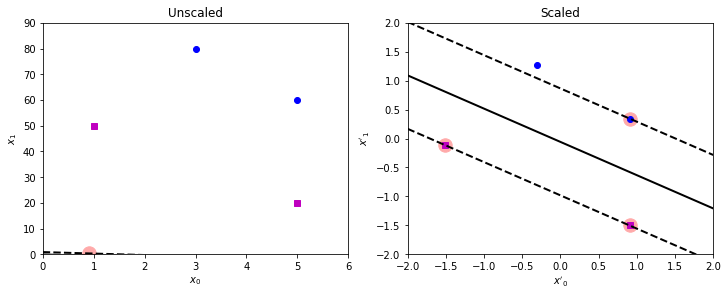

In [8]:
_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axes[0].plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
axes[0].plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6, axes[0])
axes[0].set(xlabel="$x_0$", ylabel="$x_1$", title="Unscaled")
axes[0].axis([0, 6, 0, 90])

axes[1].plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
axes[1].plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2, axes[1])
axes[1].set(xlabel="$x'_0$", ylabel="$x'_1$", title="Scaled")
axes[1].axis([-2, 2, -2, 2])

# Sensitivity to outliers


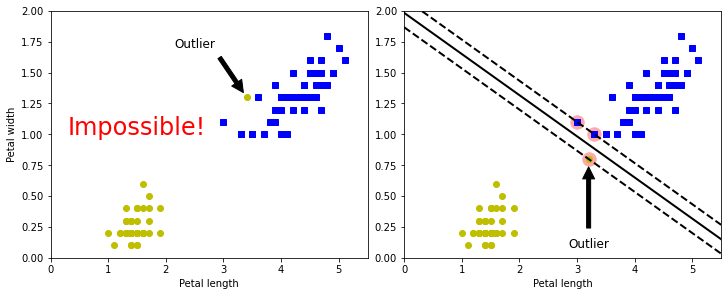

In [9]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axes[0].plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
axes[0].plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
axes[0].text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
axes[0].annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize='large',
)
axes[0].set(xlabel="Petal length",
            ylabel="Petal width",
            xlim=[0, 5.5],
            ylim=[0, 2])

axes[1].plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs")
axes[1].plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5, axes[1])
axes[1].annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize='large',
)
axes[1].set(xlabel="Petal length", xlim=[0, 5.5], ylim=[0, 2])

plt.show()

# Large margin _vs_ margin violations


This is the first code example in chapter 5:


In [10]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [12]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [13]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Now let's generate the graph comparing different regularization settings:


In [14]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf1),
])
scaled_svm_clf2 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf2),
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/opt/homebrew/Caskroom/mambaforge/base/envs/kaggle/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [15]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).flatten()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).flatten()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[Text(0, 0.5, 'Petal width')]

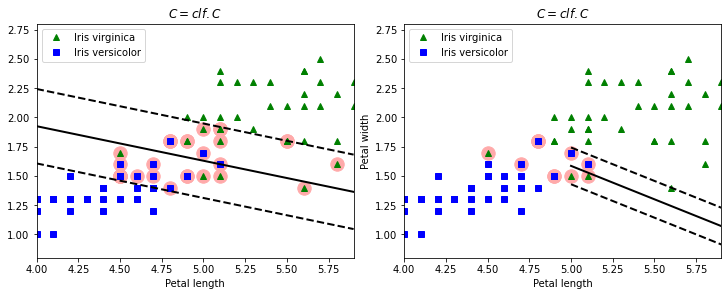

In [16]:
_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

yss = [[4, 5.9], [5, 5.99]]

for clf, ys, ax in zip([svm_clf1, svm_clf2], yss, axes.flatten()):

    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
    ymin, ymax = ys
    plot_svc_decision_boundary(clf, ymin, ymax, ax=ax)
    ax.set(xlabel="Petal length",
           title="$C = {clf.C}$",
           xlim=[4, 5.9],
           ylim=[0.8, 2.8])
    ax.legend(loc="upper left", fontsize='medium')

axes[1].set(ylabel="Petal width")

# Non-linear classification


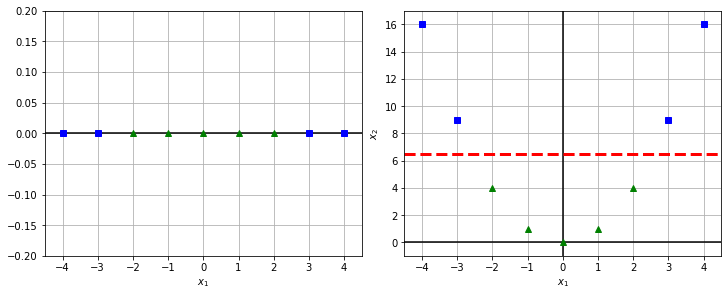

In [17]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axes[0].grid(1)
axes[0].axhline(y=0, color='k')
axes[0].plot(X1D[:, 0][y == 0], np.zeros(4), "bs")
axes[0].plot(X1D[:, 0][y == 1], np.zeros(5), "g^")
axes[0].set(xlabel=r"$x_1$", xlim=[-4.5, 4.5], ylim=[-0.2, 0.2])

axes[1].grid(1)
axes[1].axhline(y=0, color='k')
axes[1].axvline(x=0, color='k')
axes[1].plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
axes[1].plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], "g^")
axes[1].set(xlabel=r"$x_1$", ylabel=r"$x_2$", xlim=[-4.5, 4.5], ylim=[-1, 17])
axes[1].plot([-4.5, 4.5], [6.5, 6.5], "r--", lw=3)

plt.show()

In [18]:
from sklearn.datasets import make_moons

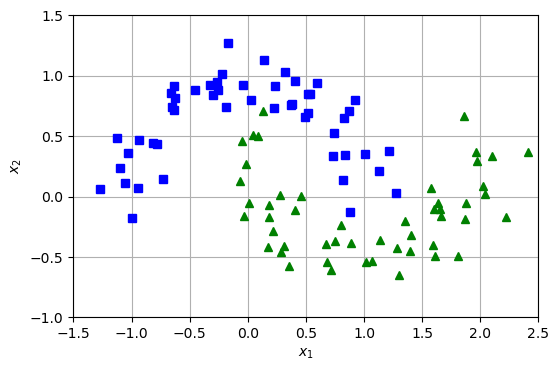

In [19]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


def plot_dataset(X, y, lims, ax):
    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    ax.axis(lims)
    ax.grid(1)
    ax.set(xlabel=r"$x_1$", ylabel=r"$x_2$")


_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5], ax)
plt.show()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [21]:
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf",
                                LinearSVC(C=10, loss="hinge",
                                          random_state=42))])

polynomial_svm_clf.fit(X, y)

/opt/homebrew/Caskroom/mambaforge/base/envs/kaggle/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [22]:
def make_mesh(lims, h):
    x = np.linspace(lims[0], lims[1], h)
    y = np.linspace(lims[2], lims[3], h)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

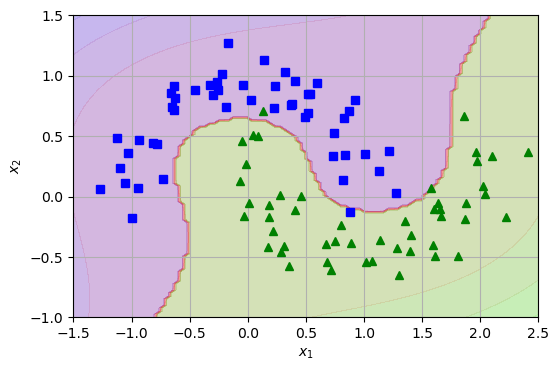

In [23]:
def plot_predictions(clf, lims, ax):
    x0, x1 = make_mesh(lims, 100)
    X = np.c_[x0.flatten(), x1.flatten()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    ax.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


_, ax = plt.subplots(figsize=(6, 4), dpi=100)

lims = [-1.5, 2.5, -1, 1.5]

plot_predictions(polynomial_svm_clf, lims, ax)
plot_dataset(X, y, lims, ax)

plt.show()

In [24]:
from sklearn.svm import SVC

In [25]:
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf",
                                 SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [26]:
poly100_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf",
                                    SVC(kernel="poly",
                                        degree=10,
                                        coef0=100,
                                        C=5))])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

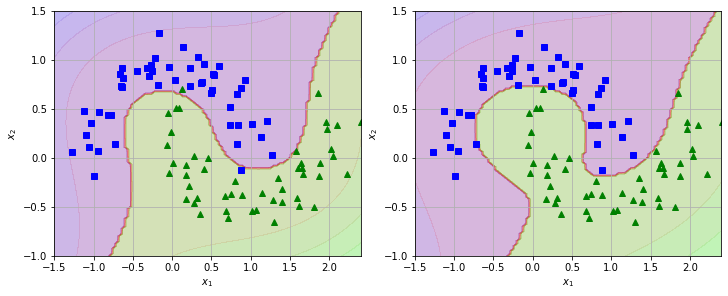

In [27]:
_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

lims = [-1.5, 2.45, -1, 1.5]
lims2 = [-1.5, 2.4, -1, 1.5]

plot_predictions(poly_kernel_svm_clf, lims, axes[0])
plot_dataset(X, y, lims2, axes[0])
ax.set(title=r"$d=3, r=1, C=5$")

plot_predictions(poly100_kernel_svm_clf, lims, axes[1])
plot_dataset(X, y, lims2, axes[1])
ax.set(title=r"$d=10, r=100, C=5$", ylabel="")

plt.show()

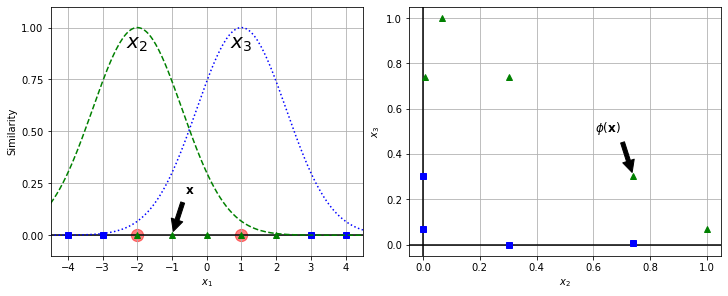

In [28]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)


gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axes[0].grid(1)
axes[0].axhline(y=0, color='k')
axes[0].scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
axes[0].plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
axes[0].plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
axes[0].plot(x1s, x2s, "g--")
axes[0].plot(x1s, x3s, "b:")
axes[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[0].set(xlabel=r"$x_1$", ylabel=r"Similarity")
axes[0].annotate(r'$\mathbf{x}$',
                 xy=(X1D[3, 0], 0),
                 xytext=(-0.5, 0.20),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize='large')
axes[0].text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
axes[0].text(1, 0.9, "$x_3$", ha="center", fontsize=20)
axes[0].axis([-4.5, 4.5, -0.1, 1.1])

axes[1].grid(1)
axes[1].axhline(y=0, color='k')
axes[1].axvline(x=0, color='k')
axes[1].plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs")
axes[1].plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^")
axes[1].set(xlabel=r"$x_2$")
axes[1].set(ylabel=r"$x_3$")
axes[1].annotate(r'$ϕ\left(\mathbf{x}\right)$',
                 xy=(XK[3, 0], XK[3, 1]),
                 xytext=(0.65, 0.50),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize='large')
ax.plot([-0.1, 1.1], [0.57, -0.1], "r--", lw=3)
ax.axis([-0.1, 1.1, -0.1, 1.1])

plt.show()

In [29]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print(f"Phi({x1_example}, {landmark}) = {k}")

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [30]:
rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5,
                                               C=0.001))])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

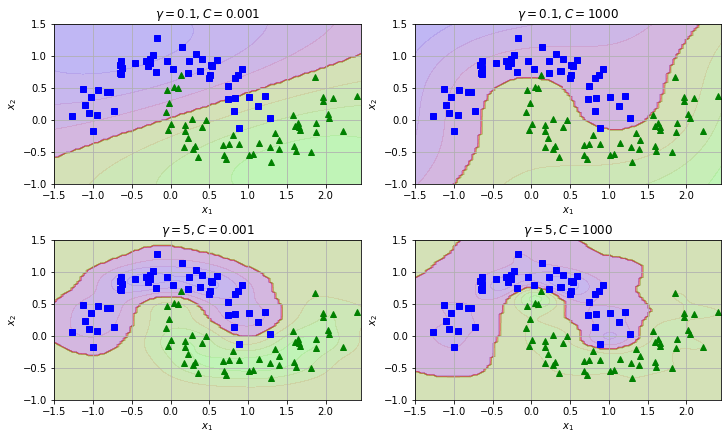

In [31]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf",
                                    SVC(kernel="rbf", gamma=gamma, C=C))])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

_, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for svm_clf, hyperparam, ax in zip(svm_clfs, hyperparams, axes.flatten()):
    lims = [-1.5, 2.45, -1, 1.5]
    plot_predictions(svm_clf, lims, ax)
    plot_dataset(X, y, lims, ax)
    gamma, C = hyperparam
    ax.set(title=f"$γ = {gamma}, C = {C}$")

plt.show()

# Regression


In [32]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).flatten()

In [33]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [34]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)


def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)


svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

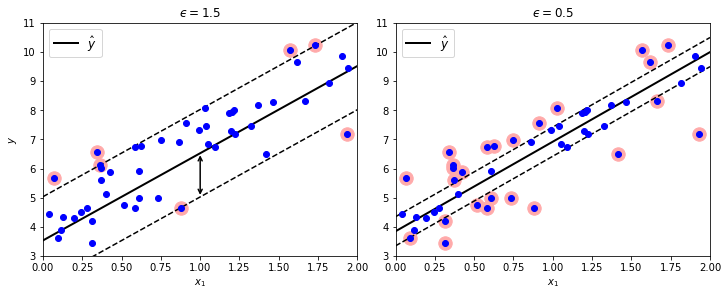

In [35]:
def plot_svm_regression(svm_reg, X, y, lims, ax):
    x1s = np.linspace(lims[0], lims[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    ax.plot(x1s, y_pred, "k-", lw=2, label=r"$\hat{y}$")
    ax.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    ax.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    ax.scatter(X[svm_reg.support_],
               y[svm_reg.support_],
               s=180,
               facecolors='#FFAAAA')
    ax.plot(X, y, "bo")
    ax.set(xlabel=r"$x_1$")
    ax.axis(lims)
    ax.legend(loc="upper left", fontsize='large')


_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

lims = [0, 2, 3, 11]

plot_svm_regression(svm_reg1, X, y, lims, axes[0])
axes[0].set(title=f"$ϵ = {svm_reg1.epsilon}$", ylabel=r"$y$")
#axes[0].plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", lw=2)
axes[0].annotate('',
                 xy=(eps_x1, eps_y_pred),
                 xycoords='data',
                 xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
                 textcoords='data',
                 arrowprops={
                     'arrowstyle': '<->',
                     'lw': 1.5
                 })
ax.text(0.91, 5.6, r"$ϵ$", fontsize=20)

plot_svm_regression(svm_reg2, X, y, lims, axes[1])
axes[1].set(title=f"$ϵ = {svm_reg2.epsilon}$")

plt.show()

In [36]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1) / 10).flatten()


In [37]:
from sklearn.svm import SVR

In [38]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [39]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly",
                    degree=2,
                    C=0.01,
                    epsilon=0.1,
                    gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

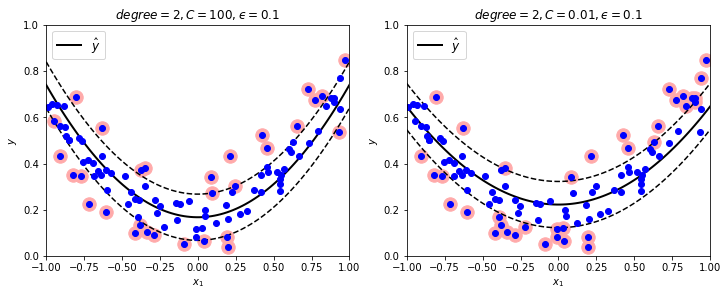

In [40]:
_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1], axes[0])
axes[0].set(
    ylabel=r"$y$",
    title=
    f"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, ϵ = {svm_poly_reg1.epsilon}$"
)

plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1], axes[1])
axes[1].set(
    ylabel=r"$y$",
    title=
    f"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, ϵ = {svm_poly_reg2.epsilon}$"
)

plt.show()

# Under the hood


In [41]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

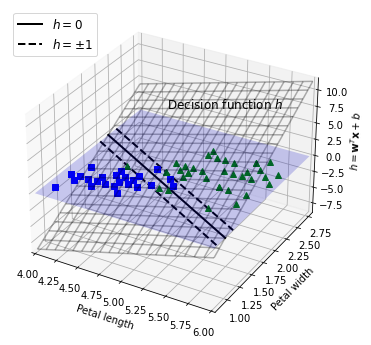

In [42]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x1, x2 = make_mesh(x1_lim + x2_lim, 20)
    xs = np.c_[x1.flatten(), x2.flatten()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s * (w[0] / w[1]) - b / w[1]
    margin_x2s_1 = -x1s * (w[0] / w[1]) - (b - 1) / w[1]
    margin_x2s_2 = -x1s * (w[0] / w[1]) - (b + 1) / w[1]
    ax.plot_surface(x1s,
                    x2,
                    np.zeros_like(x1),
                    color="b",
                    alpha=0.2,
                    cstride=100,
                    rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", lw=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", lw=2, label=r"$h=± 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", lw=2)
    ax.plot(X_crop[:, 0][y_crop == 1], X_crop[:, 1][y_crop == 1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop == 0], X_crop[:, 1][y_crop == 0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize='large')
    ax.set(xlabel=r"Petal length",
           ylabel=r"Petal width",
           zlabel=r"$h = \mathbf{w}^T \mathbf{x} + b$")
    ax.legend(loc="upper left", fontsize='large')


fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

# Small weight vector results in a large margin


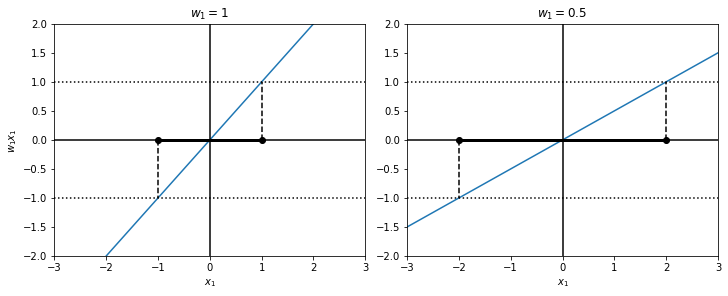

In [43]:
def plot_2D_decision_function(w, b, ax, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    ax.plot(x1, y)
    ax.plot(x1_lim, [1, 1], "k:")
    ax.plot(x1_lim, [-1, -1], "k:")
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.plot([m, m], [0, 1], "k--")
    ax.plot([-m, -m], [0, -1], "k--")
    ax.plot([-m, m], [0, 0], "k-o", lw=3)
    ax.axis(x1_lim + [-2, 2])
    ax.set(xlabel=r"$x_1$", title=f"$w_1 = {w}$")
    if ylabel:
        ax.set(ylabel=r"$w_1 x_1$")


_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

plot_2D_decision_function(1, 0, ax=axes[0])
plot_2D_decision_function(0.5, 0, ylabel=False, ax=axes[1])

plt.show()

In [44]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica


In [45]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)
svm_clf.predict([[5.3, 1.3]])

array([1.])

# Hinge loss


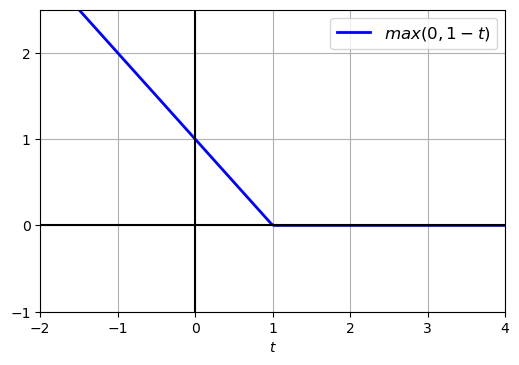

In [46]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(t, h, "b-", lw=2, label="$max(0, 1 - t)$")
ax.grid(1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set(xlabel="$t$", yticks=np.arange(-1, 2.5, 1))
ax.axis([-2, 4, -1, 2.5])
ax.legend(loc="upper right", fontsize='large')

plt.show()

# Extra material


## Training time


In [47]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")


In [48]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2 - t1)
    tols.append(tol)
    print(i, tol, t2 - t1)
    tol /= 10

[LibSVM]......................................
*.......................
*..............................................................
*...................................*.......................................................*
optimization finished, #iter = 212105
obj = -4447.997680, rho = 0.075931
nSV = 449, nBSV = 441
Total nSV = 449
0 0.1 0.1298208236694336
[LibSVM]................................................*..........................................................*..............*..............................................................*..................................................................*...........*
optimization finished, #iter = 258151
obj = -4448.479655, rho = 0.058653
nSV = 446, nBSV = 441
Total nSV = 446
1 0.01 0.1325387954711914
[LibSVM]...................................................*......*............................................................*..............................................................................*................

In [49]:
ax.semilogx(tols, times, "bo-")
ax.set(xlabel="Tolerance", ylabel="Time (seconds)")
ax.grid(1)
plt.show()

## Linear SVM classifier implementation using Batch Gradient Descent


In [50]:
# Training set
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1)  # Iris virginica


In [51]:
from sklearn.base import BaseEstimator


class MyLinearSVC(BaseEstimator):

    def __init__(self,
                 C=1,
                 eta0=1,
                 eta_d=10000,
                 n_epochs=1000,
                 random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)

    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if t==0, +1 if t==1
        X_t = X * t
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).flatten()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1 / 2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) -
                                                  b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(
                -1, 1)
            b_derivative = -self.C * np.sum(t_sv)

            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).flatten()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)


C = 2
svm_clf = MyLinearSVC(C=C, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

(0.0, 60000.0, 0.0, 100.0)

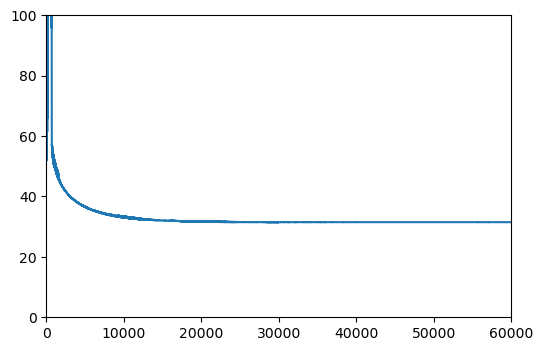

In [52]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(range(svm_clf.n_epochs), svm_clf.Js)
ax.axis([0, svm_clf.n_epochs, 0, 100])

In [53]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [54]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.flatten())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


(4.0, 6.0, 0.8, 2.8)

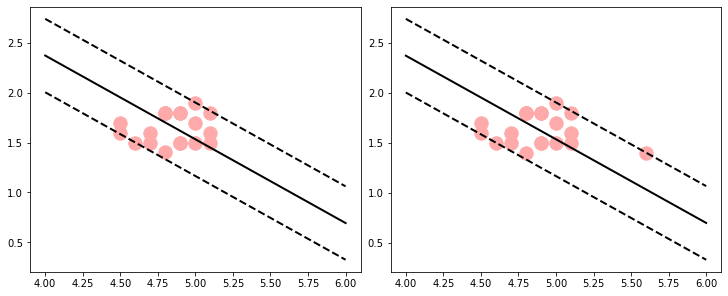

In [55]:
yr = y.flatten()
_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

ax.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], "g^", label="Iris virginica")
ax.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6, axes[0])
ax.set(xlabel="Petal length", ylabel="Petal width", title="MyLinearSVC")
ax.axis([4, 6, 0.8, 2.8])
ax.legend(loc="upper left")

ax.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], "g^")
ax.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6, axes[1])
ax.set(xlabel="Petal length", title="SVC")
ax.axis([4, 6, 0.8, 2.8])

[-12.52988101   1.94162342   1.84544824]


(4.0, 6.0, 0.8, 2.8)

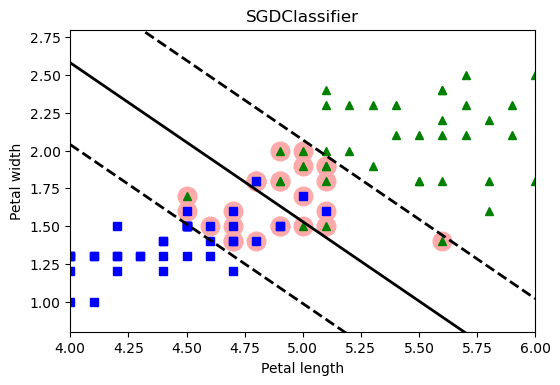

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge",
                        alpha=0.017,
                        max_iter=1000,
                        tol=1e-3,
                        random_state=42)
sgd_clf.fit(X, y.flatten())

m = len(X)
t = y * 2 - 1  # -1 if t==0, +1 if t==1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).flatten()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], "g^")
ax.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6, ax)
ax.set(xlabel="Petal length", ylabel="Petal width", title="SGDClassifier")
ax.axis([4, 6, 0.8, 2.8])

# Exercise solutions


_Exercise: train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model._


Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.


In [57]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [58]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [59]:
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge",
                        learning_rate="constant",
                        eta0=0.001,
                        alpha=alpha,
                        max_iter=1000,
                        tol=1e-3,
                        random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print(f"SGDClassifier(alpha={sgd_clf.alpha:.5f}):", sgd_clf.intercept_,
      sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


Let's plot the decision boundaries of these three models:


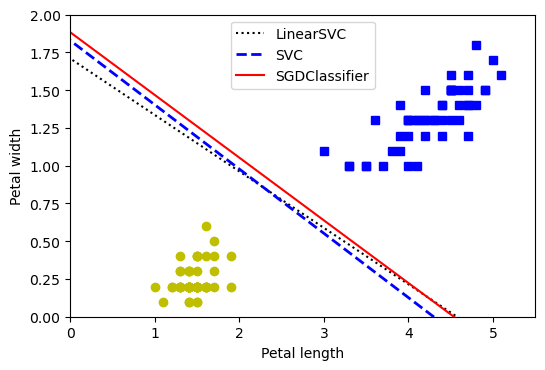

In [60]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0] / lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0] / svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0] / svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
ax.plot(line2[:, 0], line2[:, 1], "b--", lw=2, label="SVC")
ax.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")  # label="Iris versicolor"
ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")  # label="Iris setosa"
ax.set(xlabel="Petal length", ylabel="Petal width")
ax.legend(loc="upper center", fontsize='medium')
ax.axis([0, 5.5, 0, 2])

plt.show()

Close enough!


_Exercise: train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?_


First, let's load the dataset and split it into a training set and a test set. We could use `train_test_split()` but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others):


In [61]:
mnist_784 = np.load('../../data-handson/mnist_784.npz', allow_pickle=True)
X, y = mnist_784['X'], mnist_784['y']

In [62]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Many training algorithms are sensitive to the order of the training instances, so it's generally good practice to shuffle them first. However, the dataset is already shuffled, so we do not need to do it.


Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

**Warning**: this may take a few minutes depending on your hardware.


In [63]:
# lin_clf = LinearSVC(random_state=42)
# lin_clf.fit(X_train, y_train)

Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):


In [64]:
# from sklearn.metrics import accuracy_score

# y_pred = lin_clf.predict(X_train)
# accuracy_score(y_train, y_pred)

Okay, 89.5% accuracy on MNIST is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:


In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

**Warning**: this may take a few minutes depending on your hardware.


In [66]:
# lin_clf = LinearSVC(random_state=42)
# lin_clf.fit(X_train_scaled, y_train)

In [67]:
# y_pred = lin_clf.predict(X_train_scaled)
# accuracy_score(y_train, y_pred)

That's much better (we cut the error rate by about 25%), but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an `SVC` with an RBF kernel (the default).


In [68]:
from sklearn.metrics import accuracy_score

In [69]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [70]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data. Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:


In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [72]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf,
                                   param_distributions,
                                   n_iter=10,
                                   verbose=2,
                                   cv=3)

rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=5.847490967837556, gamma=0.004375955271336425; total time=   0.4s
[CV] END ....C=5.847490967837556, gamma=0.004375955271336425; total time=   0.4s
[CV] END ....C=5.847490967837556, gamma=0.004375955271336425; total time=   0.4s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235304; total time=   0.4s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235304; total time=   0.4s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235304; total time=   0.4s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825553; total time=   0.4s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825553; total time=   0.4s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825553; total time=   0.4s
[CV] END .....C=7.327377306009368, gamma=0.04329656504133618; total time=   0.4s
[CV] END .....C=7.327377306009368, gamma=0.04329656504133618; total time=   0.4s
[CV] END .....C=7.327377306009368, gamma=0.04329

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13c188a00>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13c74a350>},
                   verbose=2)

In [73]:
rnd_search_cv.best_estimator_

SVC(C=3.8786881587000437, gamma=0.0017076019229344522)

In [74]:
rnd_search_cv.best_score_

0.8599947252641863

This looks pretty low but remember we only trained the model on 1,000 instances. Let's retrain the best estimator on the whole training set:


**Warning**: the following cell may take hours to run, depending on your hardware.


In [75]:
# rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [76]:
# y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
# accuracy_score(y_train, y_pred)

Ah, this looks good! Let's select this model. Now we can test it on the test set:


In [77]:
# y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
# accuracy_score(y_test, y_pred)

Not too bad, but apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing `C` and/or `gamma`), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters `C=5` and `gamma=0.005` yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.


_Exercise: train an SVM regressor on the California housing dataset._


In [78]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

Split it into a training set and a test set:


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

Don't forget to scale the data:


In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's train a simple `LinearSVR` first:


In [81]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/opt/homebrew/Caskroom/mambaforge/base/envs/kaggle/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

Let's see how it performs on the training set:


In [82]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

Let's look at the RMSE:


In [83]:
np.sqrt(mse)

0.9819256687727764

In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`:


In [84]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [85]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(),
                                   param_distributions,
                                   n_iter=10,
                                   verbose=2,
                                   cv=3,
                                   random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   4.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   4.1s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   4.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   4.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   4.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   4.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.8s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   3.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   3.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13c502c20>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13c70fa90>},
                   random_state=42, verbose=2)

In [86]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

Now let's measure the RMSE on the training set:


In [87]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.572752477078537

Looks much better than the linear model. Let's select this model and evaluate it on the test set:


In [88]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528751